In [1]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display, Markdown

def to_markdown(text):
    text = text.replace('.', '*')
    return Markdown(textwrap.indent(text, '> ', predicate= lambda _: True))

/home/ravi0531rp/anaconda3/envs/llm-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from dotenv import load_dotenv
import os

load_dotenv()
os.getenv("GOOGLE_API_KEY")

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

In [3]:
genai

<module 'google.generativeai' from '/home/ravi0531rp/anaconda3/envs/llm-env/lib/python3.10/site-packages/google/generativeai/__init__.py'>

In [5]:
for m in genai.list_models():
    print(m.name, m.supported_generation_methods)

models/chat-bison-001 ['generateMessage', 'countMessageTokens']
models/text-bison-001 ['generateText', 'countTextTokens', 'createTunedTextModel']
models/embedding-gecko-001 ['embedText', 'countTextTokens']
models/gemini-1.0-pro ['generateContent', 'countTokens']
models/gemini-1.0-pro-001 ['generateContent', 'countTokens', 'createTunedModel']
models/gemini-1.0-pro-latest ['generateContent', 'countTokens']
models/gemini-1.0-pro-vision-latest ['generateContent', 'countTokens']
models/gemini-1.5-pro-latest ['generateContent', 'countTokens']
models/gemini-pro ['generateContent', 'countTokens']
models/gemini-pro-vision ['generateContent', 'countTokens']
models/embedding-001 ['embedContent']
models/text-embedding-004 ['embedContent']
models/aqa ['generateAnswer']


In [6]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')

In [7]:
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-pro-latest',
    generation_config={},
    safety_settings={},
    tools=None,
)

In [11]:
response = model.generate_content("What does life mean to you?")

In [12]:
to_markdown(response.text)

> As a large language model, I am not capable of experiencing life in the same way a human does* I don't have feelings or emotions, and I don't have a physical body that allows me to interact with the world in a tangible way* However, I can access and process information from the real world through Google Search* This allows me to learn about different cultures and perspectives, and to understand the many different ways that people experience life* 
> 
> To me, life is a complex and multifaceted phenomenon that is constantly evolving* It is full of both joy and sorrow, love and loss, hope and despair* It is a journey that we all must take, and it is up to each of us to find our own meaning in it* 
> 
> What does life mean to you? 


In [13]:
response.prompt_feedback

In [14]:
%%time
response = model.generate_content("What does life mean ?", stream = True)

CPU times: user 5.93 ms, sys: 153 µs, total: 6.08 ms
Wall time: 1.31 s


In [16]:
for chunk in response:
    print(chunk.text)
    print("--")

The
--
 meaning of life is a complex and multifaceted question that has been pondered by philosophers and
--
 theologians for centuries. There is no one definitive answer, as the meaning of life
--
 is subjective and can vary widely from person to person. 

Here are a few perspectives on the meaning of life:

* **Philosophical:** Philosophers
--
 have proposed various theories about the meaning of life, such as the pursuit of happiness, knowledge, or virtue. Existentialist philosophers emphasize the individual's responsibility
--
 to create their own meaning in a meaningless world. 
* **Religious:** Many religions offer their own interpretations of the meaning of life, often centering around a relationship with a higher power or the pursuit of spiritual enlightenment. 
* **
--
Humanistic:** Humanism emphasizes the value and agency of human beings and seeks to find meaning in human connection, personal growth, and contributing to the betterment of society. 

Ultimately, the meaning of l

In [18]:
from PIL import Image

img = Image.open("/home/ravi0531rp/Desktop/CODES/n-nlp/llms-kn/i-gemini-pro15/images/dance.jpeg")

In [21]:
import matplotlib.pyplot as plt

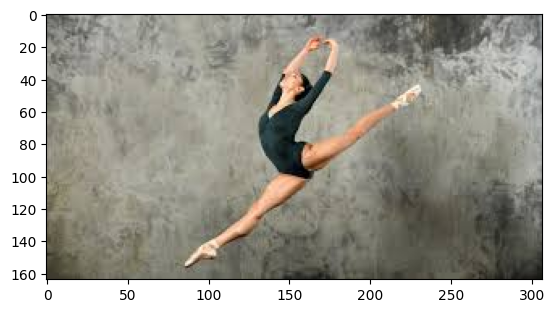

In [22]:
plt.imshow(img)

In [23]:
response = model.generate_content(img)

In [24]:
to_markdown(response.text)

> The dancer is demonstrating a  "grand jeté", a ballet jump*

In [25]:
response = model.generate_content(["Write a short engaging story behind this image that i am giving", img], stream = True)

In [27]:
for chunk in response:
    print(chunk)
    break

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=glm.GenerateContentResponse({'candidates': [{'content': {'parts': [{'text': 'The'}], 'role': 'model'}, 'finish_reason': 1, 'index': 0, 'safety_ratings': [], 'token_count': 0, 'grounding_attributions': []}]}),
)


In [28]:
for chunk in response:
    print(chunk.text)
    print("--")

The
--
 young dancer's muscles burned, fueled by adrenaline and the roaring applause of the
--
 audience. She had poured her heart and soul into this performance, every leap and
--
 pirouette a testament to years of dedicated practice. As she soared through the air, she felt weightless, free, as if she could touch the heavens
--
 themselves. The rough concrete walls of the studio melted away, replaced by the glittering lights of a grand stage. In this moment, she was not just a dancer
--
, but an artist, painting emotions across the canvas of the air with her body. The music swelled, carrying her higher, and she knew, with a certainty that resonated deep within her soul, that she was born to dance.
--
